In [1]:
import numpy as np
import pandas as pd
# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [32]:
hour_df.rename(columns={'shahid':'rec_id','irtiza':'datetime'})

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
hour_df.rename(columns={'rec_id':'shahid','datetime':'irtiza'})

,shahid,irtiza,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
df.rename(columns={'instant':'mohsin'})

,mohsin,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
df=pd.read_csv('DS2_C5_S5_BikeSharing_Data_Concept.csv')

In [2]:
df=pd.read_csv('DS2_C5_S5_BikeSharing_Data_Concept.csv')

hour_df.rename(columns={'instant':'rec_id',
'dteday':'datetime',
'holiday':'is_holiday',
'workingday':'is_workingday',
'weathersit':'weather_condition',
'hum':'humidity',
'mnth':'month',
'cnt':'total_count',
'hr':'hour',
'yr':'year'},inplace=True)

NameError: name 'hour_df' is not defined

In [36]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df['windspeed']=df['windspeed'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  int32  
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(3), int32(1), int64(12), object(1)
memory usage: 2.2+ MB


In [9]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rec_id,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
is_holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
is_workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weather_condition,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [7]:
hour_df.info()
hour_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

,count,mean,std,min,25%,50%,75%,max
rec_id,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
is_holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
is_workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weather_condition,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [10]:
hour_df.nunique()

rec_id               17379
datetime               731
season                   4
year                     2
month                   12
hour                    24
is_holiday               2
weekday                  7
is_workingday            2
weather_condition        4
temp                    50
atemp                   65
humidity                89
windspeed               30
casual                 322
registered             776
total_count            869
dtype: int64

In [40]:
hour_df['season']=hour_df['season'].astype('category')
hour_df['hour']=hour_df['hour'].astype('category')
hour_df['year']=hour_df['year'].astype('category')
hour_df['month']=hour_df['month'].astype('category')
hour_df['is_holiday']=hour_df['is_holiday'.astype('category')
hour_df['weekday']=hour_df['weekday'].astype('category') 
hour_df['is_workingday']=hour_df['is_workingday'] .astype('category')  
hour_df['weather_condition']=hour_df['weather_condition'].astype('category')  
                        

SyntaxError: '[' was never closed (3198804801.py, line 5)

In [45]:
df['season']=df['season'].astype('category')
df['yr']=df['yr'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['hr']=df['hr'].astype('category')
df['holiday']=df['holiday'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weathersit']=df['weathersit'].astype('category')



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [42]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df['season']=df['season'].astype('category')

In [13]:
df['yr']=df['yr'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  int64   
 7   weekday     17379 non-null  int64   
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  int64   
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(2), float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [12]:
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [24]:
hour_df['season']=hour_df['season'].astype('category')
hour_df['hour']=hour_df['hour'].astype('category')
hour_df['year']=hour_df['year'].astype('category')
hour_df['month']=hour_df['month'].astype('category')
hour_df['is_holiday']=hour_df['is_holiday'].astype('category')
hour_df['weekday']=hour_df['weekday'].astype('category')
hour_df['is_workingday']=hour_df['is_workingday'].astype('category')
hour_df['weather_condition']=hour_df['weather_condition'].astype('category')


In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rec_id             17379 non-null  int64   
 1   datetime           17379 non-null  object  
 2   season             17379 non-null  category
 3   year               17379 non-null  category
 4   month              17379 non-null  category
 5   hour               17379 non-null  category
 6   is_holiday         17379 non-null  category
 7   weekday            17379 non-null  category
 8   is_workingday      17379 non-null  category
 9   weather_condition  17379 non-null  category
 10  temp               17379 non-null  float64 
 11  atemp              17379 non-null  float64 
 12  humidity           17379 non-null  float64 
 13  windspeed          17379 non-null  float64 
 14  casual             17379 non-null  int64   
 15  registered         17379 non-null  int64   
 16  tota

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rec_id             17379 non-null  int64   
 1   datetime           17379 non-null  object  
 2   season             17379 non-null  category
 3   year               17379 non-null  category
 4   month              17379 non-null  category
 5   hour               17379 non-null  category
 6   is_holiday         17379 non-null  category
 7   weekday            17379 non-null  category
 8   is_workingday      17379 non-null  category
 9   weather_condition  17379 non-null  category
 10  temp               17379 non-null  float64 
 11  atemp              17379 non-null  float64 
 12  humidity           17379 non-null  float64 
 13  windspeed          17379 non-null  float64 
 14  casual             17379 non-null  int64   
 15  registered         17379 non-null  int64   
 16  tota

In [18]:
hour_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [47]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
hour_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

C:\Users\SHAHID\AppData\Local\Temp\ipykernel_836\1902582918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,lineweidths=.3,linecolor='y')


AttributeError: QuadMesh.set() got an unexpected keyword argument 'lineweidths'

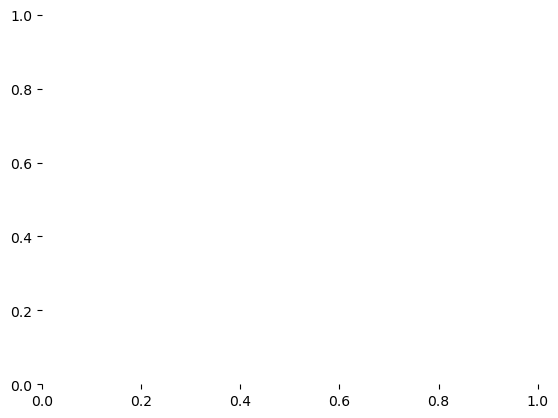

In [15]:
sns.heatmap(df.corr(),annot=True,lineweidths=.3,linecolor='y')

C:\Users\SHAHID\AppData\Local\Temp\ipykernel_836\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

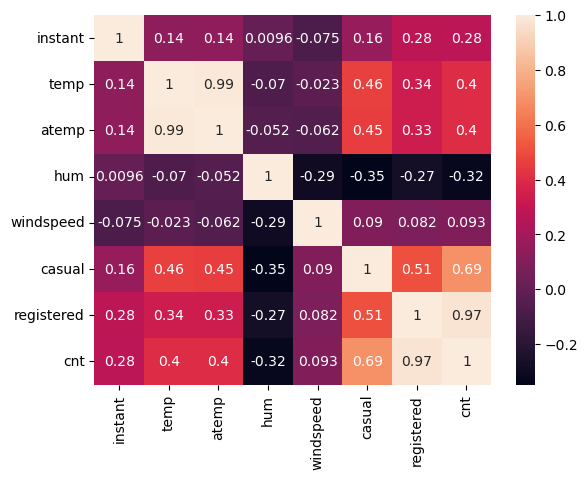

In [49]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.heatmap(hour_df.corr(),annot=True,lineweidths=.0,linecolor='y')

C:\Users\SHAHID\AppData\Local\Temp\ipykernel_836\327389941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(),annot=True,linewidths=.3,linecolor='y')


<Axes: >

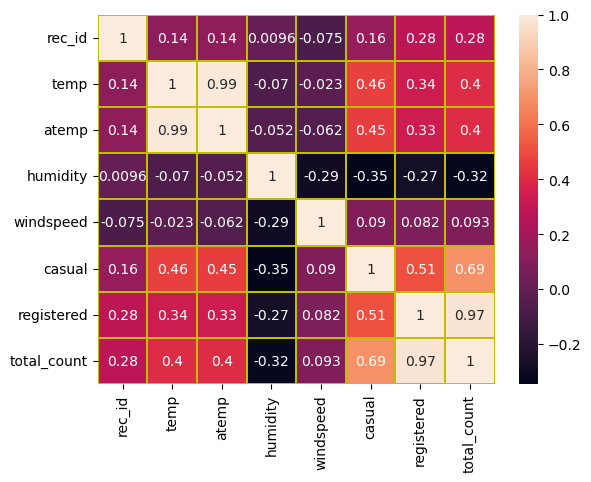

In [25]:
sns.heatmap(hour_df.corr(),annot=True,linewidths=.3,linecolor='y')

C:\Users\SHAHID\AppData\Local\Temp\ipykernel_13740\327389941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(),annot=True,linewidths=.3,linecolor='y')


<Axes: >

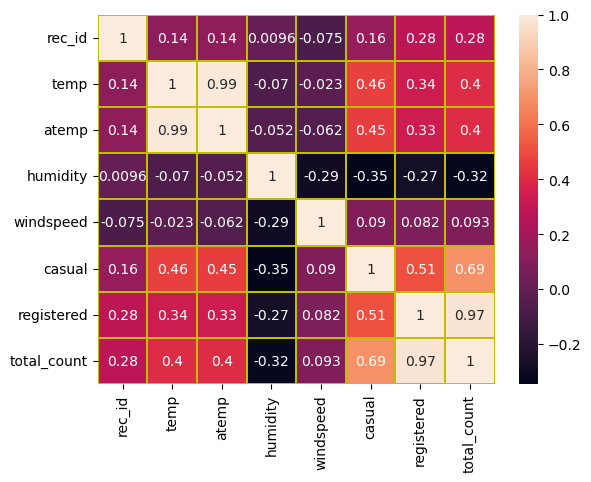

In [18]:
sns.heatmap(hour_df.corr(),annot=True,linewidths=.3,linecolor='y')

<AxesSubplot:>

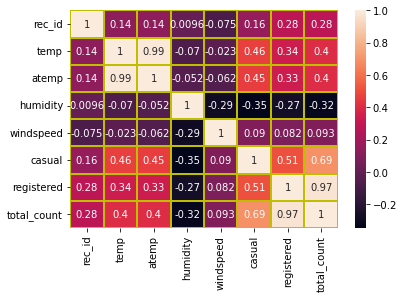

In [20]:
sns.heatmap(hour_df.corr(),annot=True,linewidths=.3,linecolor='y',)

In [26]:
dummy=pd.get_dummies(hour_df['season'],prefix='season')
df=pd.concat([hour_df,dummy],axis=1)
df.drop(columns='season',inplace=True)

In [53]:
gf=pd.get_dummies(df['season'],prefix='season')
dummy=pd.concat([df,gf],axis=1)
dummy.drop(columns='season',inplace =True)

In [19]:
gh=pd.get_dummies(df['season'],prefix='season')
dummy=pd.concat([df,gh],axis=1)
dummy.drop(columns='season',inplace=True)

In [27]:
df

,rec_id,datetime,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,1,0,0,0
17375,17376,2012-12-31,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,1,0,0,0
17376,17377,2012-12-31,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,1,0,0,0
17377,17378,2012-12-31,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,1,0,0,0


In [35]:
hour_df

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [38]:
sd=pd.get_dummies(hour_df('year'),prefix='year')

TypeError: 'DataFrame' object is not callable

In [36]:
hour_df

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [41]:
gf=pd.get_dummies(hour_df['season'],prefix='season')
dn=pd.concat([hour_df,gf],axis=1)
fg=pd.concat([hour_df,gf],axis=1)

In [43]:
vs=pd.get_dummies(hour_df['year'],prefix='year')
dx=pd.concat([hour_df,vs],axis=1)
dx.drop(columns='year',inplace=True)

In [45]:
bd=pd.get_dummies(hour_df['month'],prefix='month')
bs=pd.concat([hour_df,bd],axis=1)
dx.drop(columns='month',inplace=True)

In [39]:
df=pd.get_dummies(hour_df['season'],prefix='season')

In [32]:
sf=pd.get_dummies(hour_df['season'],prefix='season')
dummy=pd.concat([hour_df,sf],axis=1)
dummy.drop(columns='season',inplace=True)

In [56]:
season_dummy=pd.get_dummies(hour_df['season'],prefix='Season')
df_dummy=pd.concat([hour_df,season_dummy],axis=1)
df_dummy.drop(columns='season',inplace=True)

year_dummy=pd.get_dummies(hour_df['year'],prefix='year')
df_dummy=pd.concat([df_dummy,year_dummy],axis=1)
df_dummy.drop(columns='year',inplace=True)

hour_dummy=pd.get_dummies(hour_df['hour'],prefix='hour')
df_dummy=pd.concat([df_dummy,hour_dummy],axis=1)
df_dummy.drop(columns='hour',inplace=True)

weather_condition_dummy=pd.get_dummies(hour_df['weather_condition'],prefix='weather_condition')
df_dummy=pd.concat([df_dummy,weather_condition_dummy],axis=1)
df_dummy.drop(columns='weather_condition',inplace=True)


month_dummy=pd.get_dummies(hour_df['month'],prefix='month')
df_dummy=pd.concat([df_dummy,month_dummy],axis=1)
df_dummy.drop(columns='month',inplace=True)


is_holiday_dummy=pd.get_dummies(hour_df['is_holiday'],prefix='is_holiday')
df_dummy=pd.concat([df_dummy,is_holiday_dummy],axis=1)
df_dummy.drop(columns='is_holiday',inplace=True)

weekday_dummy=pd.get_dummies(hour_df['weekday'],prefix='weekday')
df_dummy=pd.concat([df_dummy,weekday_dummy],axis=1)
df_dummy.drop(columns='weekday',inplace=True)


is_workingday_dummy=pd.get_dummies(hour_df['is_workingday'],prefix='is_workingday')
df_dummy=pd.concat([df_dummy,is_workingday_dummy],axis=1)
df_dummy.drop(columns='is_workingday',inplace=True)


In [27]:
df_dummy.drop(columns='datetime',inplace=True)


In [28]:
df_dummy.drop(columns='rec_id',inplace=True)

In [57]:
X=df_dummy.drop(columns='total_count')
y=df_dummy['total_count']

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

ValueError: could not convert string to float: '2011-01-01'

In [60]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt=DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)


In [74]:
df=DecisionTreeRegressor(max_depth=3,min_samples_split=4,max_leaf_nodes=10)

In [ ]:
gh=DecessionTreeRegresor(max_depth=3,min_sample_split,max_leaf_node=10)

In [67]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)
DT.fit(X_train,y_train)
print(DT.score(X_train,y_train))
DT.fit(X_test,y_test)
print(DT.score(X_train,y_train))

0.9393800806336876
0.9419795204161152


In [74]:
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

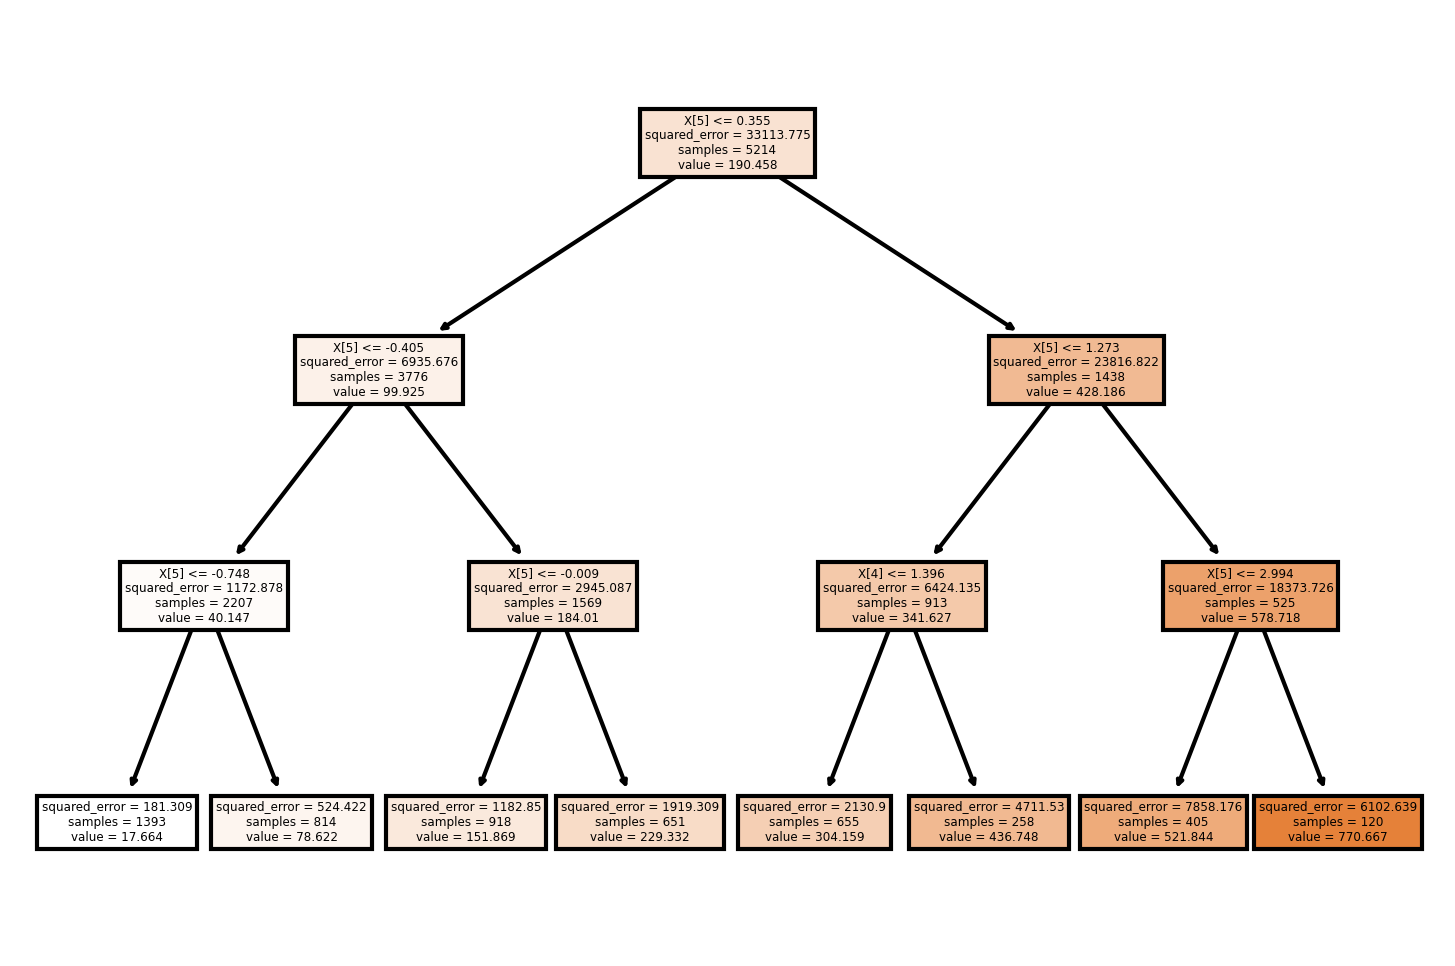

In [72]:
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(DT,filled = True);
#save figure in current directory as png
fig.savefig('Bike_regression_decisiontree.png')

In [76]:
df_dummy

,temp,atemp,humidity,windspeed,casual,registered,total_count,Season_1,Season_2,Season_3,...,is_holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,is_workingday_0,is_workingday_1
0,0.24,0.2879,0.81,0.0000,3,13,16,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.22,0.2727,0.80,0.0000,8,32,40,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.22,0.2727,0.80,0.0000,5,27,32,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.24,0.2879,0.75,0.0000,3,10,13,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.24,0.2879,0.75,0.0000,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,11,108,119,1,0,0,...,0,0,1,0,0,0,0,0,0,1
17375,0.26,0.2576,0.60,0.1642,8,81,89,1,0,0,...,0,0,1,0,0,0,0,0,0,1
17376,0.26,0.2576,0.60,0.1642,7,83,90,1,0,0,...,0,0,1,0,0,0,0,0,0,1
17377,0.26,0.2727,0.56,0.1343,13,48,61,1,0,0,...,0,0,1,0,0,0,0,0,0,1


# Cross Validation

In [78]:
#hold out
X = [9,19,29,39,49,59,69,79,89,99]
from sklearn.model_selection import train_test_split
train_test_split(X,test_size=.30,random_state=1)


[[49, 9, 39, 19, 79, 89, 59], [29, 99, 69]]

In [80]:
#leave one out
X = [9,19,29,39,49,59,69,79,89,99]
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
for i,j in loo.split(X):
    print(i,j)


[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [87]:
#K-fold
X = [9,19,29,39,49,59,69,79,89,99]
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=False,random_state=None)
for i,j in kf.split(X):
    print(i,j)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [96]:
from sklearn.model_selection import StratifiedKFold
X = np.array([[9,19],[29,39],[49,59],[69,79],[89,99],[109,119]])
y= np.array([0,0,1,0,1,1])
sf=StratifiedKFold(n_splits=3,shuffle=False,random_state=None)
for i,j in sf.split(X,y):
    print(i,j)

[1 3 4 5] [0 2]
[0 2 3 5] [1 4]
[0 1 2 4] [3 5]


In [89]:
X

array([[  9,  19],
       [ 29,  39],
       [ 49,  59],
       [ 69,  79],
       [ 89,  99],
       [109, 119]])